In [1]:
import numpy as np
import logging
import sys
from matplotlib import pyplot as plt

%matplotlib inline
logging.basicConfig(
    format="%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.INFO,
)
sys.path.append("../")

import torch
from torchvision.datasets import MNIST
from torchvision import transforms

from aef.models.aef import Autoencoder
from aef.trainer import AutoencoderTrainer
from aef.losses import nll, mse


## Data

In [2]:
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

mnist = MNIST('./data', download=True, transform=img_transform)

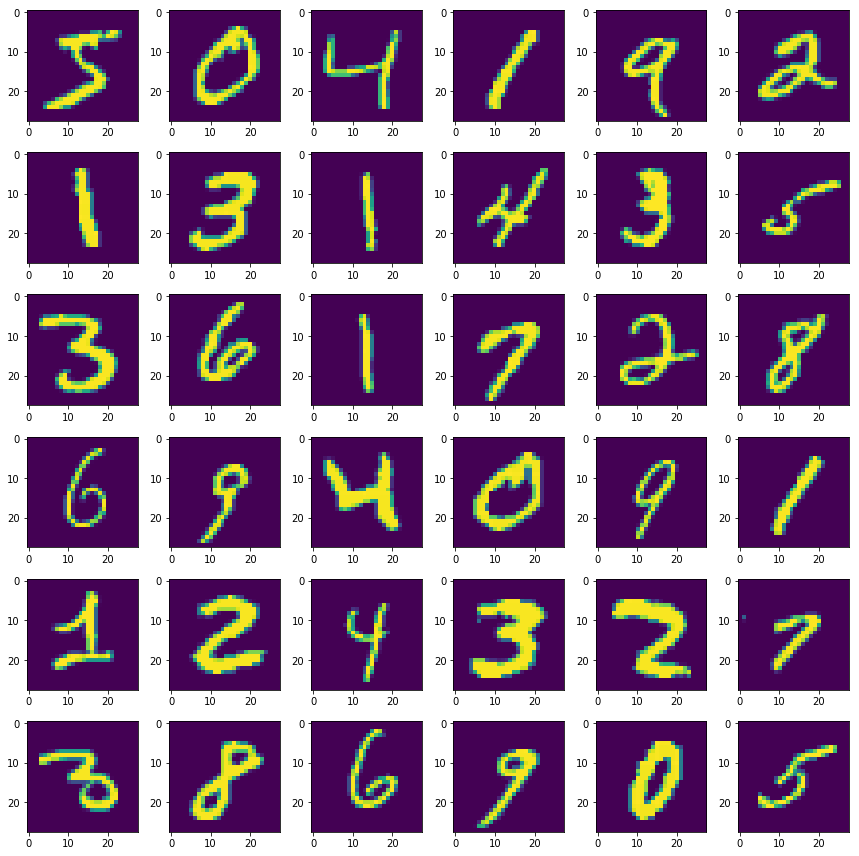

In [3]:
fig = plt.figure(figsize=(12,12))

for i in range(36):
    ax = plt.subplot(6, 6, i + 1)
    img, _ = mnist[i]
    plt.imshow(img.reshape((28,28)))
        
plt.tight_layout()
plt.show()

## Train autoencoder

In [27]:
latent_dim=3

ae = Autoencoder(n_mades=3, latent_dim=latent_dim)
ae_trainer = AutoencoderTrainer(ae)

In [ ]:
ae_trainer.train(
    dataset=mnist,
    loss_functions=[mse, nll],
    loss_weights=[1., 0.01],
    loss_labels=["MSE", "NLL"],
    batch_size=256,
    epochs=1,
)

## Visualize latent space

In [ ]:
x = torch.cat([mnist[i][0].unsqueeze(0) for i in range(1000)], dim=0)
y = np.asarray([mnist[i][1] for i in range(1000)])

In [ ]:
h = ae.encoder(x)
h = h.detach().numpy().reshape((-1,latent_dim))

In [ ]:
u = ae.latent(x)
u = u.detach().numpy().reshape((-1,latent_dim))

In [ ]:
h

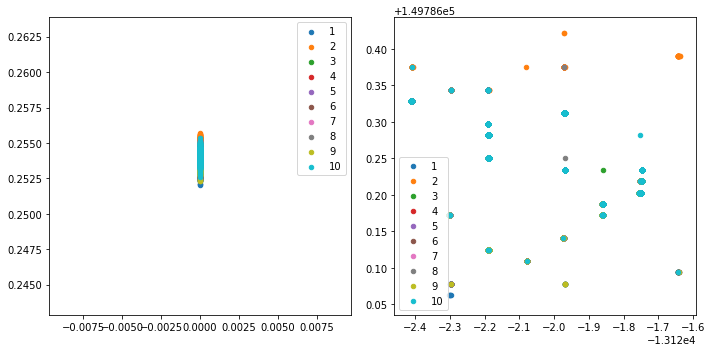

In [24]:
fig = plt.figure(figsize=(10,5))

ax = plt.subplot(1,2,1)
for i in range(10):
    plt.scatter(h[y==i][:,0], h[y==i][:,1], c="C{}".format(i), s=20., label="{}".format(i+1))
plt.legend()
    
ax = plt.subplot(1,2,2)
for i in range(10):
    plt.scatter(u[y==i][:,0], u[y==i][:,1], c="C{}".format(i), s=20., label="{}".format(i+1))
plt.legend()

plt.tight_layout()
plt.show()


In [26]:
h

array([[0.        , 0.2540283 ],
       [0.        , 0.2536327 ],
       [0.        , 0.25444293],
       ...,
       [0.        , 0.2541106 ],
       [0.        , 0.25433844],
       [0.        , 0.25427324]], dtype=float32)